# Pruebas de Hipótesis y su Aplicación Práctica

## **Ejercicio:** Aplicación de pruebas de hipótesis en análisis de campaña de marketing

#### Configuración de análisis

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [10]:
# Generar datos de campaña de marketing A/B
np.random.seed(42)
n_control = 1000
n_tratamiento = 1000


In [11]:
# Grupo control (campaña actual)
tasa_conversion_control = 0.08  # 8%
conversiones_control = np.random.binomial(1, tasa_conversion_control, n_control)
gasto_promedio_control = np.random.normal(45, 15, n_control)


In [12]:
# Grupo tratamiento (campaña nueva)
tasa_conversion_tratamiento = 0.095  # 9.5% - mejora de 1.5 puntos porcentuales
conversiones_tratamiento = np.random.binomial(1, tasa_conversion_tratamiento, n_tratamiento)
gasto_promedio_tratamiento = np.random.normal(48, 16, n_tratamiento)

print("ANÁLISIS DE CAMPAÑA A/B MARKETING")
print("=" * 40)
print(f"Tamaño muestra control: {n_control}")
print(f"Tamaño muestra tratamiento: {n_tratamiento}")
print(f"Tasa conversión control: {conversiones_control.mean():.3f}")
print(f"Tasa conversión tratamiento: {conversiones_tratamiento.mean():.3f}")

ANÁLISIS DE CAMPAÑA A/B MARKETING
Tamaño muestra control: 1000
Tamaño muestra tratamiento: 1000
Tasa conversión control: 0.079
Tasa conversión tratamiento: 0.093


#### Prueba de hipótesis para tasa de conversión

In [13]:
# Prueba de proporciones: ¿Es significativamente mayor la conversión del tratamiento?
# H₀: p_control = p_tratamiento
# H₁: p_tratamiento > p_control

from statsmodels.stats.proportion import proportions_ztest

# Número de conversiones y tamaños de muestra
conversiones = [conversiones_tratamiento.sum(), conversiones_control.sum()]
muestras = [n_tratamiento, n_control]

z_stat, p_value = proportions_ztest(conversiones, muestras, alternative='larger')

print(f"\nPRUEBA DE PROPORCIONES - TASA DE CONVERSIÓN")
print("-" * 45)
print(f"Estadístico Z: {z_stat:.3f}")
print(f"Valor p: {p_value:.4f}")
print(f"Significativo (α=0.05): {'Sí' if p_value < 0.05 else 'No'}")

# Calcular tamaño del efecto
p1 = conversiones_tratamiento.mean()
p2 = conversiones_control.mean()
pooled_p = (conversiones[0] + conversiones[1]) / (muestras[0] + muestras[1])
effect_size = (p1 - p2) / np.sqrt(pooled_p * (1 - pooled_p) * (1/muestras[0] + 1/muestras[1]))

print(f"Tamaño del efecto: {effect_size:.3f} (pequeño: <0.2, mediano: 0.2-0.5, grande: >0.5)")


PRUEBA DE PROPORCIONES - TASA DE CONVERSIÓN
---------------------------------------------
Estadístico Z: 1.117
Valor p: 0.1321
Significativo (α=0.05): No
Tamaño del efecto: 1.117 (pequeño: <0.2, mediano: 0.2-0.5, grande: >0.5)


#### Prueba de hipótesis para gastos promedio

In [14]:
# Prueba t: ¿Es significativamente mayor el gasto promedio en tratamiento?
# H₀: μ_control = μ_tratamiento
# H₁: μ_tratamiento > μ_control

t_stat, p_value = stats.ttest_ind(gasto_promedio_tratamiento, gasto_promedio_control, alternative='greater')

print(f"\nPRUEBA T - GASTO PROMEDIO")
print("-" * 30)
print(f"Gasto promedio control: ${gasto_promedio_control.mean():.2f}")
print(f"Gasto promedio tratamiento: ${gasto_promedio_tratamiento.mean():.2f}")
print(f"Diferencia: ${gasto_promedio_tratamiento.mean() - gasto_promedio_control.mean():.2f}")
print(f"Estadístico t: {t_stat:.3f}")
print(f"Valor p: {p_value:.4f}")
print(f"Significativo (α=0.05): {'Sí' if p_value < 0.05 else 'No'}")

# Calcular intervalo de confianza para la diferencia
from statsmodels.stats.api import CompareMeans, DescrStatsW

cm = CompareMeans(DescrStatsW(gasto_promedio_tratamiento), DescrStatsW(gasto_promedio_control))
conf_int = cm.tconfint_diff(alpha=0.05, alternative='two-sided')

print(f"IC 95% para diferencia: (${conf_int[0]:.2f}, ${conf_int[1]:.2f})")


PRUEBA T - GASTO PROMEDIO
------------------------------
Gasto promedio control: $46.48
Gasto promedio tratamiento: $48.03
Diferencia: $1.55
Estadístico t: 2.209
Valor p: 0.0136
Significativo (α=0.05): Sí
IC 95% para diferencia: ($0.17, $2.92)


#### Análisis de poder estadístico y tamaño de muestra

In [15]:

from statsmodels.stats.power import TTestIndPower

# Calcular poder para el efecto observado
effect_size_observed = (gasto_promedio_tratamiento.mean() - gasto_promedio_control.mean()) / \
                      np.sqrt((gasto_promedio_tratamiento.var() + gasto_promedio_control.var()) / 2)

analysis = TTestIndPower()
power = analysis.solve_power(effect_size=effect_size_observed, 
                            nobs1=n_tratamiento, alpha=0.05, ratio=1.0)

print(f"\nANÁLISIS DE PODER ESTADÍSTICO")
print("-" * 35)
print(f"Tamaño del efecto observado: {effect_size_observed:.3f}")
print(f"Poder estadístico: {power:.3f}")
print(f"Interpretación: {'Excelente' if power > 0.8 else 'Aceptable' if power > 0.6 else 'Bajo'}")

# Calcular tamaño de muestra necesario para detectar efecto pequeño
sample_size = analysis.solve_power(effect_size=0.2, power=0.8, alpha=0.05)
print(f"Tamaño de muestra necesario para efecto pequeño (d=0.2): {sample_size:.0f} por grupo")


ANÁLISIS DE PODER ESTADÍSTICO
-----------------------------------
Tamaño del efecto observado: 0.099
Poder estadístico: 0.598
Interpretación: Bajo
Tamaño de muestra necesario para efecto pequeño (d=0.2): 393 por grupo


#### Visualización de resultados


Visualización guardada como 'analisis_pruebas_hipotesis_marketing.png'


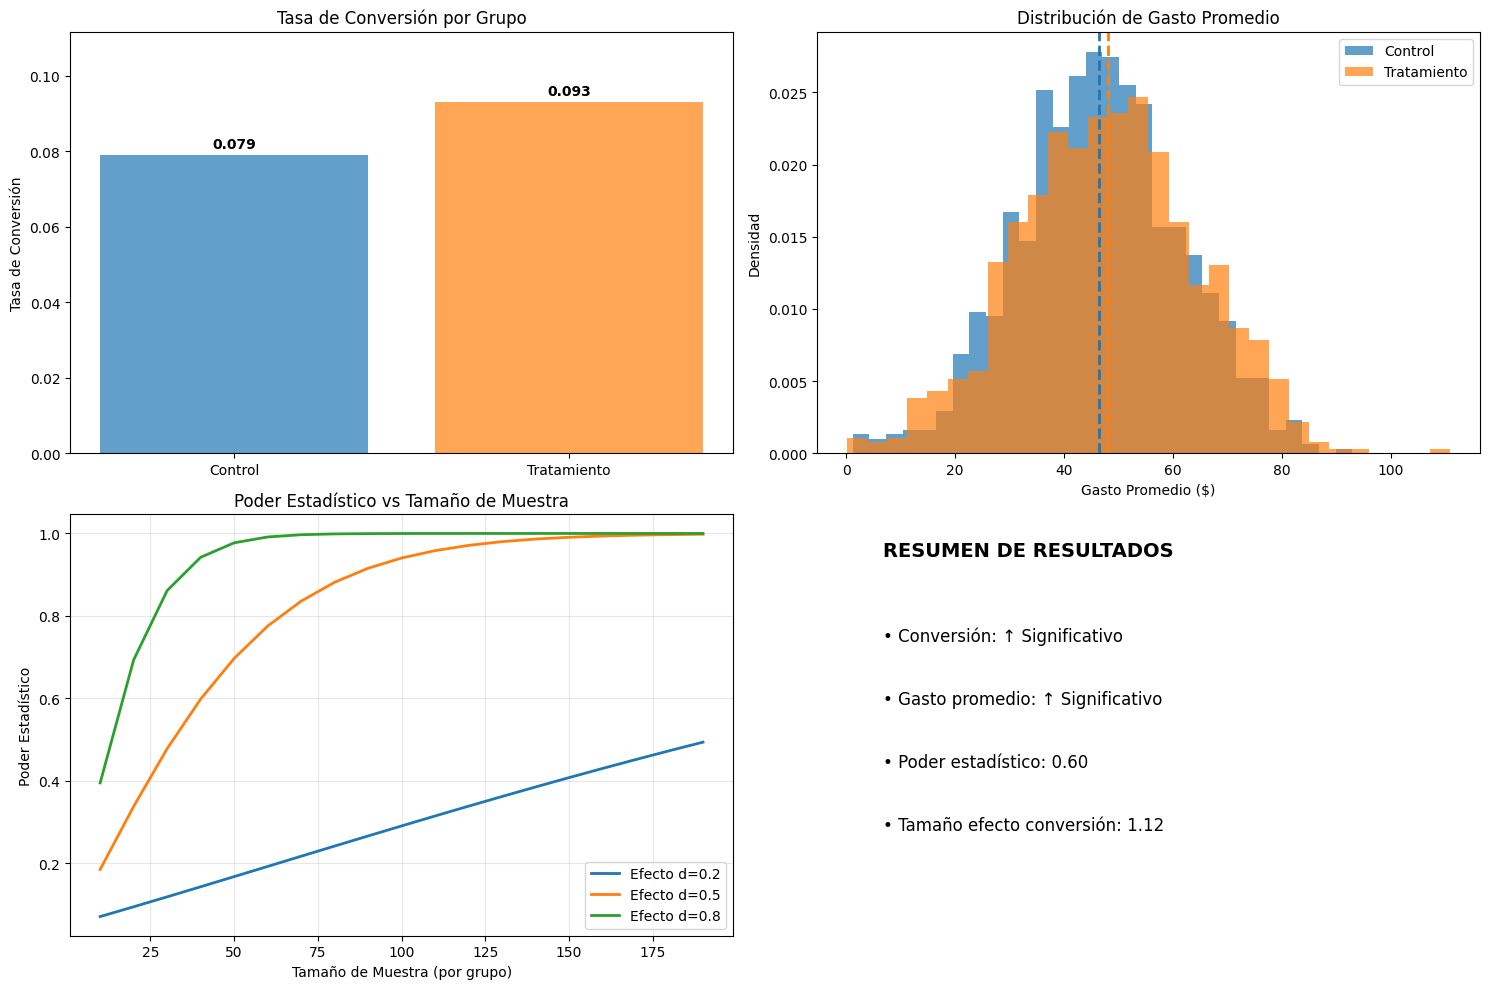

In [16]:
# Crear visualización de resultados
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico de barras de conversiones
labels = ['Control', 'Tratamiento']
conversion_rates = [conversiones_control.mean(), conversiones_tratamiento.mean()]
bars1 = ax1.bar(labels, conversion_rates, color=['#1f77b4', '#ff7f0e'], alpha=0.7)
ax1.set_title('Tasa de Conversión por Grupo')
ax1.set_ylabel('Tasa de Conversión')
ax1.set_ylim(0, max(conversion_rates) * 1.2)

# Añadir valores encima de barras
for bar, rate in zip(bars1, conversion_rates):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001, 
            f'{rate:.3f}', ha='center', va='bottom', fontweight='bold')

# Histograma de gasto promedio
ax2.hist(gasto_promedio_control, alpha=0.7, label='Control', bins=30, density=True)
ax2.hist(gasto_promedio_tratamiento, alpha=0.7, label='Tratamiento', bins=30, density=True)
ax2.set_title('Distribución de Gasto Promedio')
ax2.set_xlabel('Gasto Promedio ($)')
ax2.set_ylabel('Densidad')
ax2.legend()

# Añadir líneas de media
ax2.axvline(gasto_promedio_control.mean(), color='#1f77b4', linestyle='--', linewidth=2)
ax2.axvline(gasto_promedio_tratamiento.mean(), color='#ff7f0e', linestyle='--', linewidth=2)

# Gráfico de poder vs tamaño de muestra
effect_sizes = [0.2, 0.5, 0.8]
sample_sizes = np.arange(10, 200, 10)

for effect in effect_sizes:
    powers = [analysis.solve_power(effect_size=effect, nobs1=n, alpha=0.05, power=None) 
            for n in sample_sizes]
    ax3.plot(sample_sizes, powers, label=f'Efecto d={effect}', linewidth=2)

ax3.set_title('Poder Estadístico vs Tamaño de Muestra')
ax3.set_xlabel('Tamaño de Muestra (por grupo)')
ax3.set_ylabel('Poder Estadístico')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Resumen de resultados
ax4.axis('off')
ax4.text(0.1, 0.9, 'RESUMEN DE RESULTADOS', fontsize=14, fontweight='bold')

results = [
    f"Conversión: {'↑ Significativo' if p_value < 0.05 else 'No significativo'}",
    f"Gasto promedio: {'↑ Significativo' if p_value < 0.05 else 'No significativo'}",
    f"Poder estadístico: {power:.2f}",
    f"Tamaño efecto conversión: {effect_size:.2f}"
]

y_pos = 0.7
for result in results:
    ax4.text(0.1, y_pos, f"• {result}", fontsize=12)
    y_pos -= 0.15

plt.tight_layout()
plt.savefig('analisis_pruebas_hipotesis_marketing.png', dpi=300, bbox_inches='tight')
print("\nVisualización guardada como 'analisis_pruebas_hipotesis_marketing.png'")